# Part 1

## Part 1.1 : Data preprocessing

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
data = pd.read_json("users.json")
data = data[data['created'].notnull()]

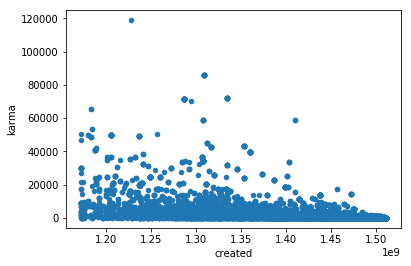

In [224]:
#data = data.sort_values('created',ascending = True)
data.plot.scatter(x="created", y="karma")

## Part 1.2 : Model selection

Based on the scatter-plot above, we determined that a straight line would fit the best, because the bulk of the data points a close together in a horizontal line, and the rest can be considered outliers. So we have choosen a linear model.

## Part 1.3: Model training

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [226]:
# Here we reshape our columns.
karma = np.array(data['karma']).reshape(9299, 1)
created = np.array(data['created']).reshape(9299, 1)

In [227]:
model = LinearRegression()
model.fit(created, karma)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [228]:
y_pred = model.predict(created)

In [229]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(karma, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(karma, y_pred))
model.intercept_

Coefficients: 
 [[ -3.68490613e-05]]
Mean squared error: 68167119.14
Variance score: 0.14


array([ 54944.17572095])

## Part 1.4: Model evaluation

The model uses the column 'Karma' as the Y-value. 'Karma' is the amount of points an user have accumulated. The column 'Created' is the X-value. It is a unix timestamp of when the user created their account.

We have choosen to use these parameters, because the task is to find out how much time an user has to spend to reach a 'karma' score of 1000. The result we got is 1463730976.6848958 which translate to 05/20/2016. So if you created your account before or on this data 05/20/2016. You should have a minimum of 1000 points.

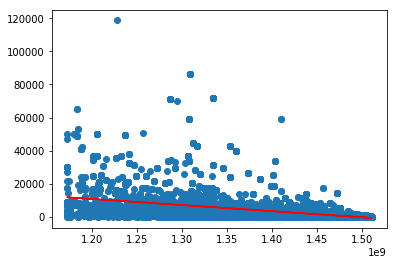

In [230]:
plt.scatter(created,karma)
plt.plot(created,y_pred,'r')
#plt.ylim(0, 10000)
plt.show()

In [231]:
(1000-55660.19119786)/-3.73430583e-05

1463730976.6848958

# Part 2


In [232]:
creat_and_submit = np.array(data[['created','submitted']]).reshape(9299, 2)

In [233]:
model.fit(creat_and_submit,karma)
y_pred = model.predict(creat_and_submit)

In [234]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(karma, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(karma, y_pred))
model.intercept_

Coefficients: 
 [[ -6.70038250e-06   2.66071059e+00]]
Mean squared error: 22814189.97
Variance score: 0.71


array([ 9630.44853853])

The model parameteres are the same as earlier, except now we have an extra feature which is the "submitted" column. We have not been able to answer the other questions in this part. This is due to the fact that we could not make sense of the output data and we could not figure out how to calculate the 2 unknown x variables from a given Y value, which in this case is 1000.

# Part 3

In [235]:
wdbc_data = pd.read_csv('wdbc.data.csv')

## Part 3.1 Looking at the data

The most noteable features is the "Diagnosis" column, which appears to be a binary value in the sense that it can only be one of two values, either 'M' og 'B'.

## 3.2: Building the model

We think that radius and area have the most impact, since they reflect the size of the cancer cell. A bigger cell must be worse than a smaller one is our guess.

## 3.3 Evaluating the model

In [236]:
y = wdbc_data.iloc[:,1]
radius_worst = wdbc_data.iloc[:,22]
area_worst = wdbc_data.iloc[:,25]
texture_mean = wdbc_data.iloc[:,3]
smoothnes_worst =  wdbc_data.iloc[:,26]


x = np.array([area_worst,texture_mean,smoothnes_worst]).reshape(-1, 3)


x.shape

(568, 3)

In [237]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [238]:
predicted = model_log.predict(x)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y, predicted, normalize=False)
print('Accuracy score is : ',acc_score)
acc_score/(len(y))*100

Accuracy score is :  366


64.436619718309856

The accuracy score determines the percentage chance that any given prediction is correct. In our case it is only correct 64,5 % of the times. Which is almost equal to flipping af coin.